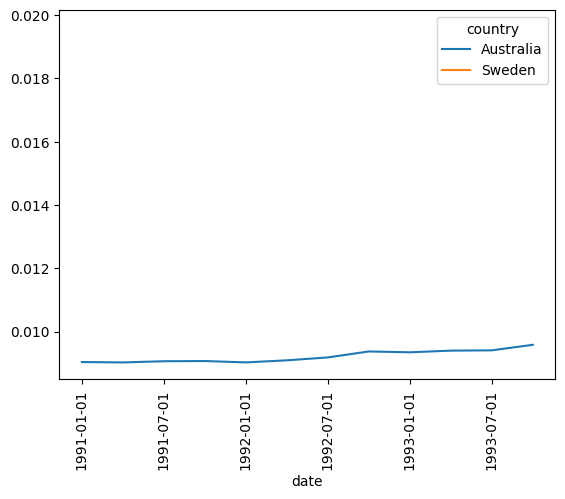

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

gdp_data = {'date': ['1990-01-01', '1990-04-01', '1990-07-01', '1990-09-01', '1991-01-01', '1991-04-01', '1991-07-01', '1991-09-01', '1992-01-01', '1992-04-01', '1992-07-01', '1992-09-01', '1993-01-01', '1993-04-01', '1993-07-01', '1993-09-01'],
            'country': ['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia'],
            'gdp': [158051.132, 158263.582, 157329.279, 158240.678, 156195.954, 155989.033, 156635.858, 156744.057, 157916.081, 159047.827, 160658.176, 163960.221, 165097.495, 166027.059, 166203.179, 169279.348]}

gdp = pd.DataFrame(gdp_data)

pop_data = {'date': ['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01', '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01'],
            'country': ['Australia', 'Australia', 'Australia', 'Australia', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
            'pop': [17065100, 17284000, 17495000, 17667000, 8558835, 8617375, 8668067, 8718561]}

pop = pd.DataFrame(pop_data)

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop   
recent_gdp_pop.plot(rot=90)
plt.show()
